In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

**Introduction to Clustering**

Clustering is a technique used in unsupervised learning, where the goal is to group similar data points together based on certain features or characteristics. Unlike supervised learning, clustering does not have labeled data, and the algorithm needs to find the inherent structure within the data itself.


What is *K-Means clustering*?

K-Means clustering is one of the simplest and most popular clustering algorithms. It partitions the data into a predefined number of clusters, where each data point belongs to the cluster with the nearest mean (centroid). The algorithm iteratively assigns data points to the nearest centroid and then recalculates the centroids based on the mean of the data points in each cluster. This process continues until the centroids no longer change significantly or a specified number of iterations is reached.

**Let's plot some synthetic data to work with**

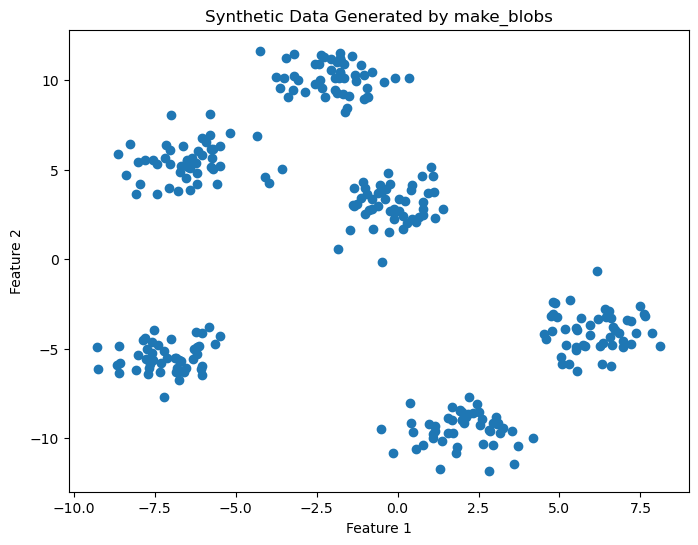

In [3]:
n_samples = 300         # Total number of data points
centers = 6             # Number of clusters in the data
random_state = 104      # Random state for reproducibility

# Create synthetic data using make_blobs
X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)

# Visualizing the generated data

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Data Generated by make_blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Implementing K-Mean clustering from scratch**

In order to really understand what's going on under the hood of the algorithm, we'll implement K-Means directly through Python. 

Later, we'll see that the whole process below will be handled by the KMeans-function in scikit-learn.

*In short:*

The K-Means algorithm works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based 
on the mean of the points assigned to each cluster. This process continues until convergence, where centroids no longer change significantly 
or a predefined number of iterations is reached.

*Define the necessary functions:*

In [9]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[clusters == i].mean(axis=0)
    return centroids

def kmeans_from_scratch(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Step 1: Random Initialization of Centroids')
    plt.show()
    iterations = 0
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        plt.figure(figsize=(10, 8))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'Step {i+2+iterations}: Assign Points to Nearest Centroids')
        plt.show()
        new_centroids = update_centroids(X, clusters, k)
        plt.figure(figsize=(10, 8))
        plt.scatter(X[:, 0], X[:, 1], s=50)
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=100, marker='X')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'Step {i+3+iterations}: Update Centroids')
        plt.show()
        iterations += 1
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

Great, now we proceed with the implementations. Before we start, you need to decide on
the number of cluster *k* to find

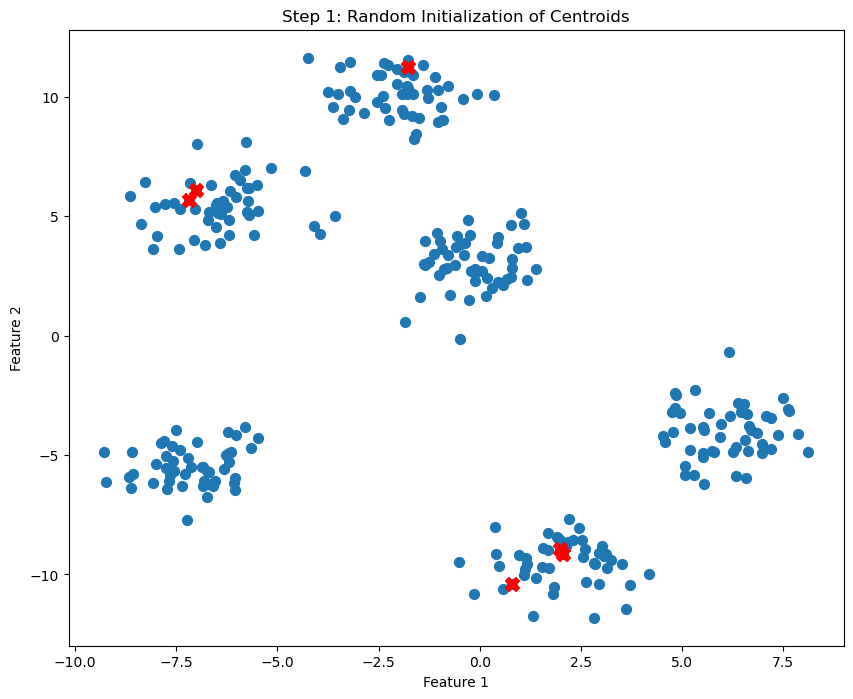

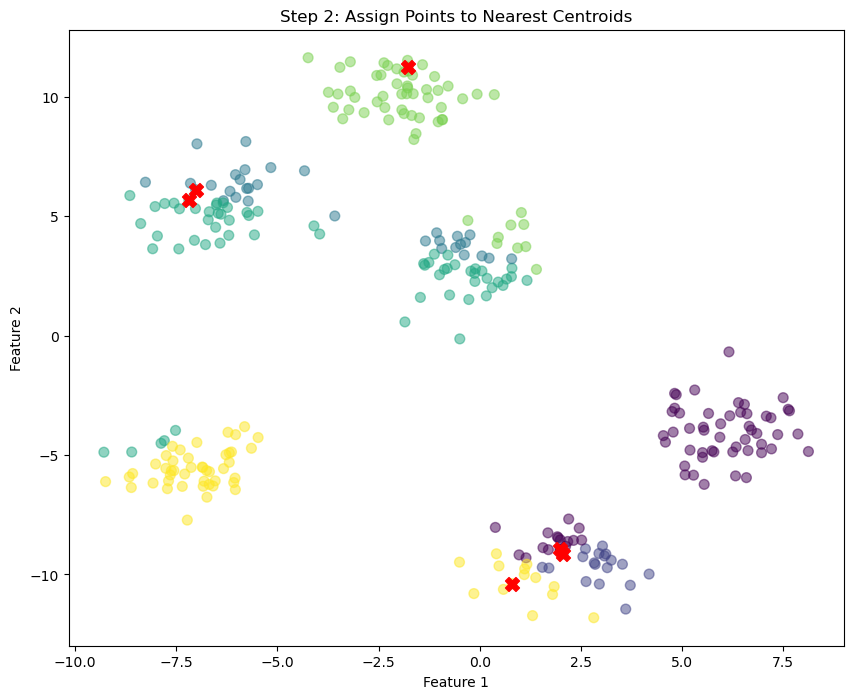

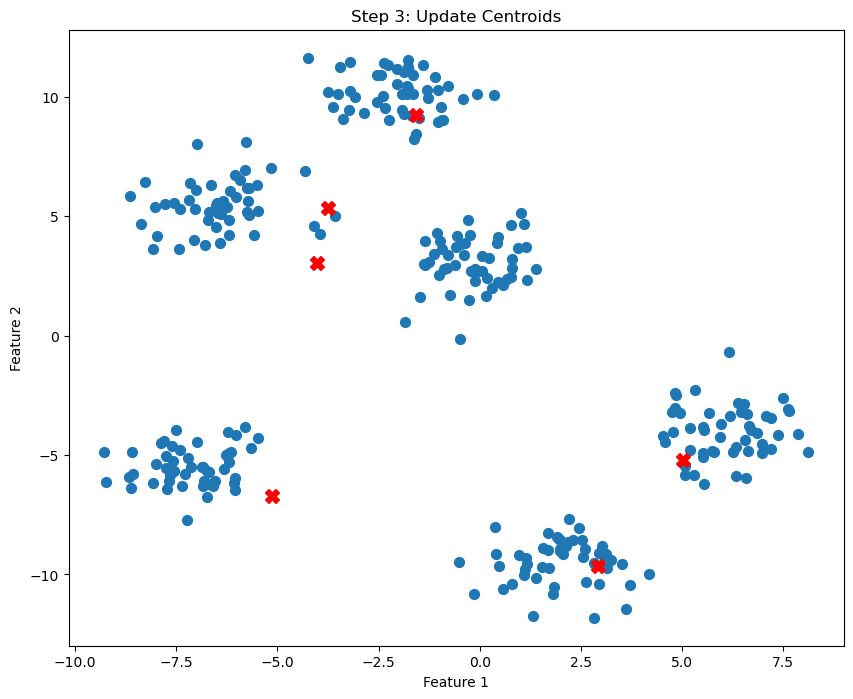

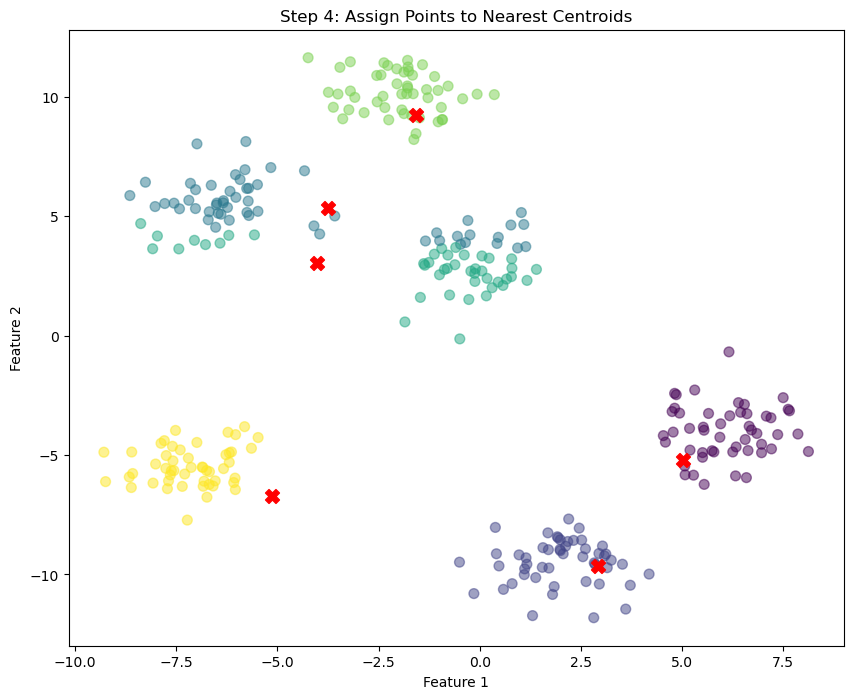

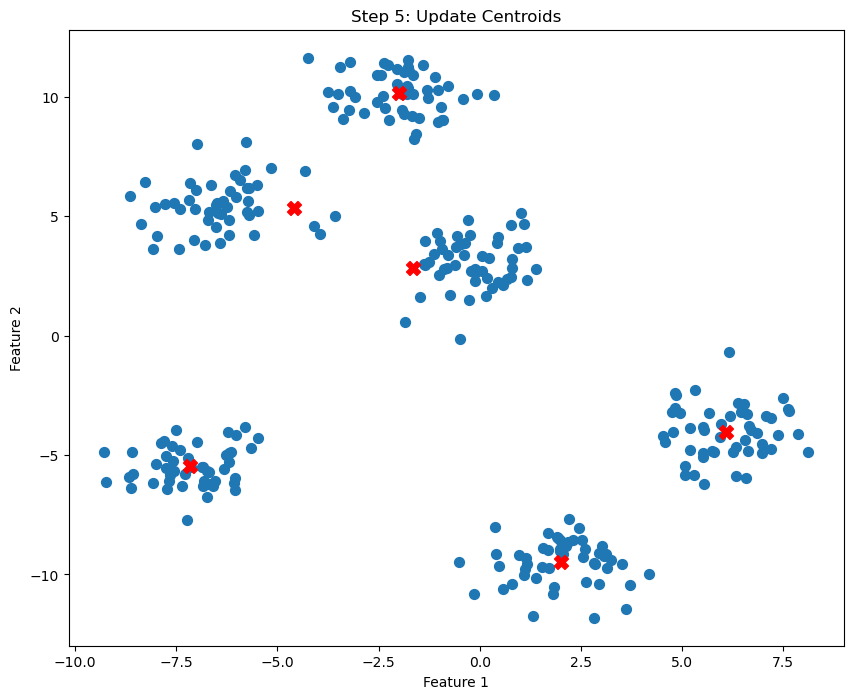

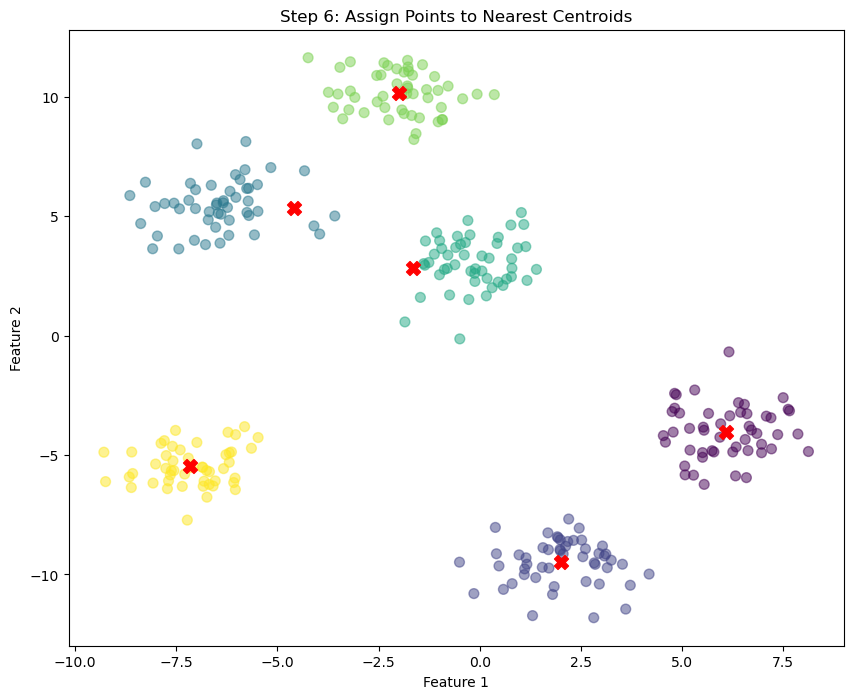

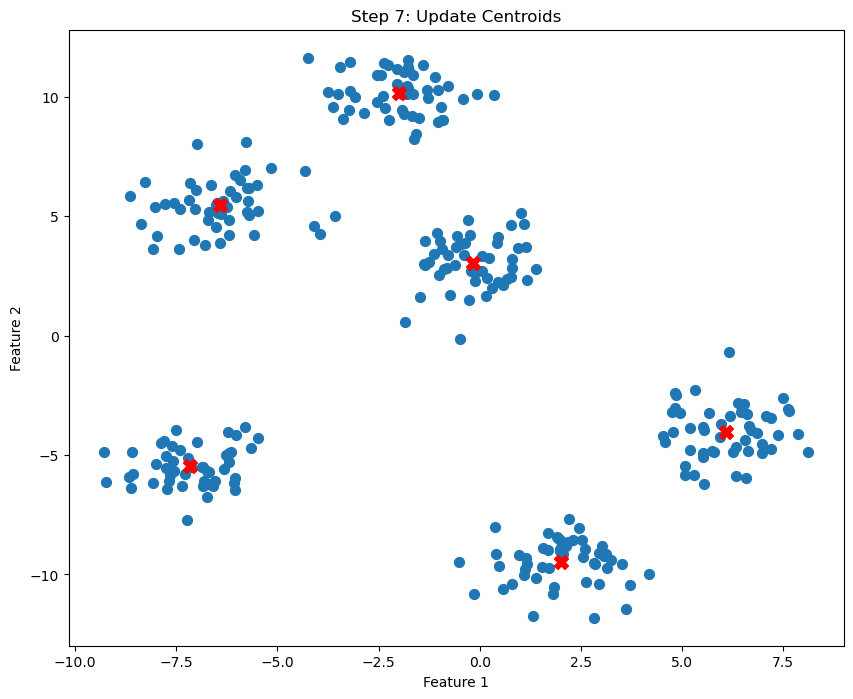

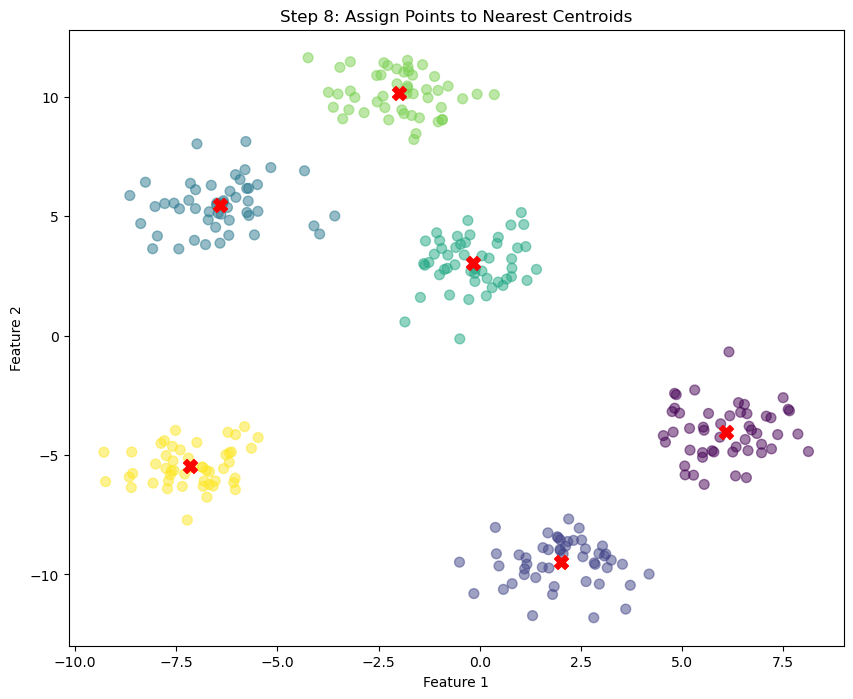

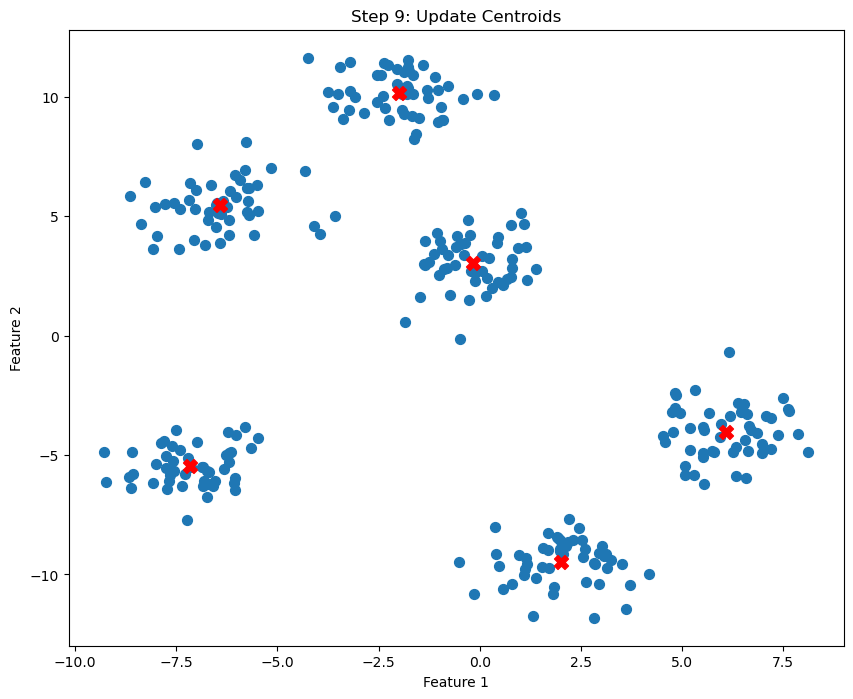

Final centroids:
[[ 6.09020319 -4.03167469]
 [ 2.00952515 -9.48546258]
 [-6.41724043  5.4612717 ]
 [-0.16768287  3.03888379]
 [-1.99226309 10.15399475]
 [-7.14918235 -5.47126791]]


In [5]:
#Applying K-Means from scratch


k = 6                      # decide on the the number of clusters the algorithm should look out for

# initialize the algorithm
final_centroids, final_clusters = kmeans_from_scratch(X, k)

# print coordinates for the identified clusters
print("Final centroids:")
print(final_centroids)

**scikit-learn implementation**

In [6]:
k=6

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)           # remember that we defined the number k previousy

kmeans.fit(X)                           # use KMeans to find k clusters in the data

# We can now extract the identified centroids
centroids = kmeans.cluster_centers_

for i, centroid in enumerate(centroids):
    print(f'Coordinates for cluster {i}: {centroid}')

Coordinates for cluster 0: [-7.14918235 -5.47126791]
Coordinates for cluster 1: [-0.16768287  3.03888379]
Coordinates for cluster 2: [ 2.00952515 -9.48546258]
Coordinates for cluster 3: [ 6.09020319 -4.03167469]
Coordinates for cluster 4: [-1.99226309 10.15399475]
Coordinates for cluster 5: [-6.41724043  5.4612717 ]


Compare the obtained centroids using scikit-learns k-means, with ours!

---

## Challenges 

**Task 0**

Understand the following points:


Note that, like KNN, KMeans is a distance based algorithm and it's thus *critical* to make sure that our features are at the same scale. Most often, you therefore have to do feature scaling to get sensible results from Kmeans.

Also, it goes without saying perhaps: you can use more than two features. In fact, you can use as many as you like.

**Task 1**

Try changing the random state for the synthetic data generator - so that you get different data from what we already have.

Then, re-run the simulation and check the results for both kmean_from_scratch and kmeans from scikit-learn.

*NOTE*: 

Sometimes, if you're unlucky, you'll see that KMeans wont actually converge and instead get stuck, yielding a bad end result.

This happens when you sometimes have a bad/unlucky initialization of your clusters.

**Task 2**

Play around some bit more with KMeans. This time, try also changing the number of clusters when generating the data. Also try changing the number of clusters *k* that your algorithm should try to find. 

*NOTE*:

The number of clusters in the data, and the number of clusters for the algorithm to find do **NOT** have to be the same. Try having different values for each and see what happens.

**Task 3**

How do we choose the optimal value of *k* for KMeans? We very rarely know in advance the amount of clusters to identify in the data.

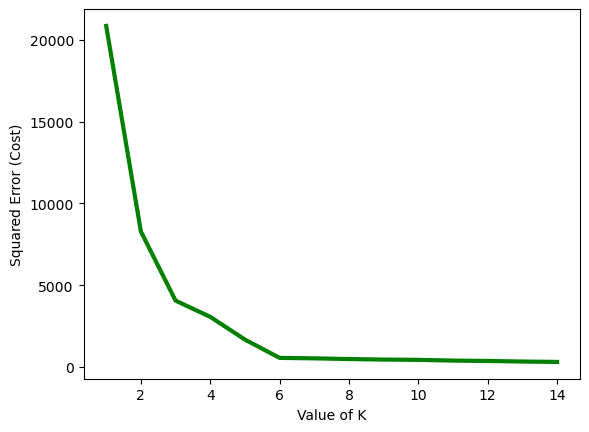

In [8]:
cost =[]


for k in range(1, 15):
    
    KM = KMeans(n_clusters = k, max_iter = 500)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
 
# plot the cost against K values
plt.plot(range(1, 15), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

This is called the Elbow-method and you can read more about it [here](https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/)!